### Check that cytoscape is connected

In [1]:
import CleanData as cda
import pandas as pd
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.0',
 'automationAPIVersion': '1.3.0',
 'py4cytoscapeVersion': '0.0.11'}

### Import differential expression data and identify differentially expressed genes

In [14]:
male_data = 'FCGXXM-vs-FCGXYM-all-diffexp'
male_DEGs = cda.CleanData(male_data)

female_data = "FCGXYF-vs-FCGXXF-all-diffexp"
female_DEGs = cda.CleanData(female_data)

### Query STRING database to build a network of protein-protein interactions using the differentially expressed genes.

In [15]:
string_query_male = 'string protein query query='+male_DEGs.genes_string()+' cutoff=0.4 species="Mus musculus" limit=150'
p4c.commands_run(string_query_male)

test_table = p4c.get_table_columns('node','display name')
print(test_table)

string_query_female = 'string protein query query='+female_DEGs.genes_string()+' cutoff=0.4 species="Mus musculus" limit=150'
p4c.commands_run(string_query_female)

test_table = p4c.get_table_columns('node','display name')
print(test_table)

      display name
41473         Wdr5
41218        Kdm5d
41476      mt-Atp6
41221        Ddx3y
41479        Ddx39
...            ...
41458      Eif2ak4
41461         Qars
41464        Ddx21
41467         Rps3
41470       Eef1a1

[161 rows x 1 columns]
      display name
58624       Ddx39b
58369      Gm10256
58627          Fus
58372        Ash2l
58630         Ezh2
...            ...
58360         Rbmy
58618        Dpy30
58363        Rps4x
58621         Cct5
58366        Ddx3x

[162 rows x 1 columns]


### Display the newly built networks

In [41]:
# Get network names and suids. Network list is ordered from most recent STRING query to earliest STRING query 
# (i.e., female network is at index 0 and male network is at index 1)
network_names = p4c.get_network_list()

female_network_suid = p4c.get_network_suid(network_names[0])
male_network_suid = p4c.get_network_suid(network_names[1])

p4c.notebook_export_show_image(network=female_network_suid)

NameError: name 'female_network_suid' is not defined

In [ ]:
p4c.notebook_export_show_image(network=male_network_suid)

### Filter out unconnected nodes

No edges selected.
No edges selected.


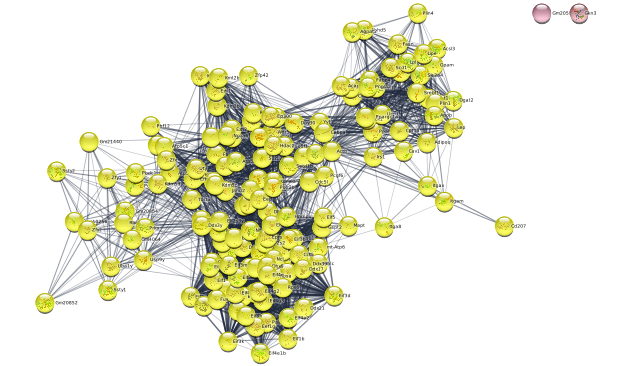

In [29]:
# select all nodes except low degree nodes, e.g., those with 0 edges
p4c.create_degree_filter('female degree filter', [0,0], predicate='IS_NOT_BETWEEN', network=female_network_suid)
p4c.create_degree_filter('male degree filter', [0,0], predicate='IS_NOT_BETWEEN', network=male_network_suid)

# create a subnetwork of the selected set of nodes and all relevant edges
p4c.create_subnetwork(subnetwork_name='female DEGs', network=female_network_suid)
p4c.create_subnetwork(subnetwork_name='male DEGs', network=male_network_suid)

# grab subnetwork suids
female_subnetwork_suid = p4c.get_network_suid('female DEGs')
male_subnetwork_suid = p4c.get_network_suid('male DEGs')

p4c.notebook_export_show_image(network=female_subnetwork_suid)

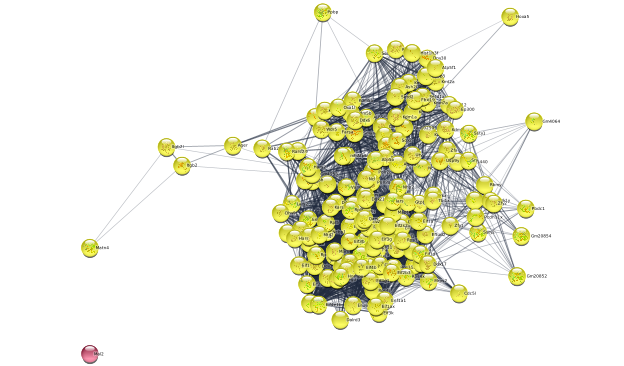

In [30]:
p4c.notebook_export_show_image(network=male_subnetwork_suid)

- In the Style tab of the Control Panel, switch the style from STRING style v1.5 to default in the drop-down at the top.
    - [DONE] Change the default node shape to ellipse
- check Lock node width and height.
- Set the default node fill color to light gray.
    - [DONE] Set the default node size to 40.
- Set the default Border Width to 2, and make the default Border Paint dark gray.
- For node Fill Color, create a continuous mapping for logFC, with the default ColorBrewer yellow-orange-red shades gradient.
- Finally, for Node Label, set a passthrough mapping for display name.
- Save your new visualization under Copy Style... in the Options menu of the Style interface, and name it de genes up.

### Color nodes based on log fold change

In [ ]:
# TODO: merge lfc and padj columns into p4c networks, then do color mapping based on lfc column

defaults = {'NODE_SHAPE': 'ellipse', 'NODE_SIZE': 40}
node_labels = map_visual_property('node label', 'COMMON', 'p')    # todo
node_fills = map_visual_property('node fill color', 'Degree', 'd', ['1', '2'], ['#FF9900', '#66AAAA'])    # todo
edge_width = map_visual_property('edge width', 'EdgeBetweenness', 'p')    # todo
create_visual_style('log2foldchange', defaults=defaults, mappings=[node_labels, node_fills, edge_width])

From Wikipedia: "Force-directed graph drawing algorithms are a class of algorithms for drawing graphs in an aesthetically-pleasing way. Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible"

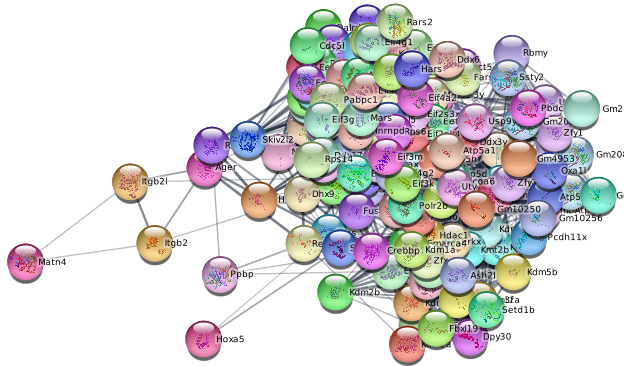

In [40]:
# Force the networks to look pretty. You can use either network suid or network name in the argument
# p4c.layout_network('circular', ovarian_suid)
p4c.layout_network('force-directed', female_subnetwork_suid)
p4c.layout_network('force-directed', male_subnetwork_suid)

In [9]:
p4c.get_table_column_names()

['SUID',
 'shared name',
 'stringdb::canonical name',
 'display name',
 'stringdb::full name',
 'stringdb::database identifier',
 'stringdb::description',
 '@id',
 'stringdb::namespace',
 'stringdb::node type',
 'query term',
 'stringdb::sequence',
 'stringdb::species',
 'stringdb::STRING style',
 'stringdb::enhancedLabel Passthrough',
 'compartment::cytoskeleton',
 'compartment::cytosol',
 'compartment::endoplasmic reticulum',
 'compartment::endosome',
 'compartment::extracellular',
 'compartment::golgi apparatus',
 'compartment::lysosome',
 'compartment::mitochondrion',
 'compartment::nucleus',
 'compartment::peroxisome',
 'compartment::plasma membrane',
 'stringdb::interactor score',
 'stringdb::structures',
 'tissue::adrenal gland',
 'tissue::blood',
 'tissue::bone',
 'tissue::bone marrow',
 'tissue::eye',
 'tissue::gall bladder',
 'tissue::heart',
 'tissue::intestine',
 'tissue::kidney',
 'tissue::liver',
 'tissue::lung',
 'tissue::muscle',
 'tissue::nervous system',
 'tissue::pan

In [8]:
print(data.df)

    index geneNames      baseMean  log2FoldChange     lfcSE       stat  \
0     458      Ager     22.092693        1.315639  0.264250   4.473211   
1    4561     Ddx3y    497.465575       -4.163370  0.269437 -15.384030   
2    5361   Eif2s3y    260.300392       -4.292619  0.266664 -15.240941   
3   15778   Gm29650      2.002712       -1.117940  0.280978  -4.930755   
4   26689     Hoxa5      7.805076        1.211460  0.265923   4.140435   
5   27857     Kdm5d    160.409316       -4.512303  0.259441 -13.326495   
6   28257     Lars2  29388.955493       -1.183901  0.226199  -5.533450   
7   28844      Mal2     16.513845        1.335363  0.266642   4.315821   
8   28981     Matn4     10.323542        1.240426  0.283728   4.156097   
9   29537   Mir6236   2528.458113       -1.618307  0.245479  -7.056001   
10  33728      Ppbp     15.563998        1.260736  0.285432   4.227972   
11  39854       Uty    213.918865       -4.504642  0.259827 -13.634464   
12  40590      Xist    939.625168     

STEP 1: build a regulatory network for females (XX vs XY) and for males (XX vs XY)
- FOR PPI: use the MusMusculus_binary_hq.txt file as the interaction network input (or download a different interaction network file from HINT: High quality INTeractomes)
    - you may have to reformat the file so that cytoscape will accept it
- FOR GRN: you'll need a list of raw gene expression data (which we have) and a list of transcription factors to use as hubs (which I can ask Nora for)

----------------------------------------------------------
- centrality analysis: which genes are hub genes?
- GO analysis: what families do DEGs belong to?

In [ ]:
# Do centrality analysis here

In [ ]:
# Do GO analysis here